In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sys
import matplotlib.animation as animation
import glob, re

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [111]:
def generate_heatmap(X, Y, Z, minZ, maxZ, cmap='jet', logscale=False, save=None, isolines=None):
    if logscale:
        norm = colors.LogNorm(vmin=minZ, vmax=maxZ)
    else:
        norm = colors.Normalize(vmin=minZ, vmax=maxZ)
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.pcolormesh(X, Y, Z, cmap=cmap, norm=norm)
    ax.set_xlabel('Length [nm]')
    ax.set_ylabel('log(Doping) [cm$^{-3}$]')
    # ax.set_title('Cost function')
    fig.colorbar(im, ax=ax)

    if isolines is not None:
        ax.contour(X, Y, Z, levels=isolines, colors='k', linewidths=0.5)


    if save is not None:
        fig.savefig(save, dpi=300, bbox_inches='tight')
    plt.show()

In [112]:
file = "../build/main_cost_function.csv"
length_intrinsic, doping_acceptor, BV, BP, DW, BV_COST, BP_COST, DW_COST, COST = np.loadtxt(file, delimiter=',', unpack=True, skiprows=1)


Size of the grid: 40 x 40 = 1600
Breakdown voltage [V]


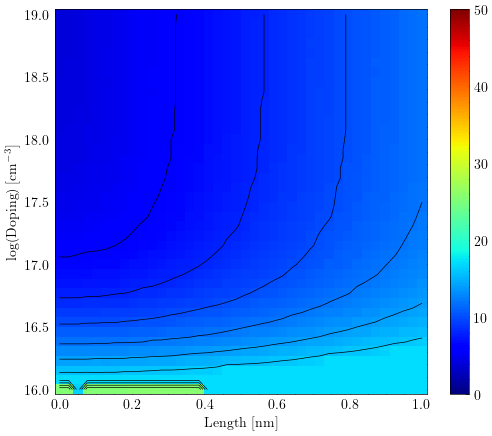

Breakdown voltage cost


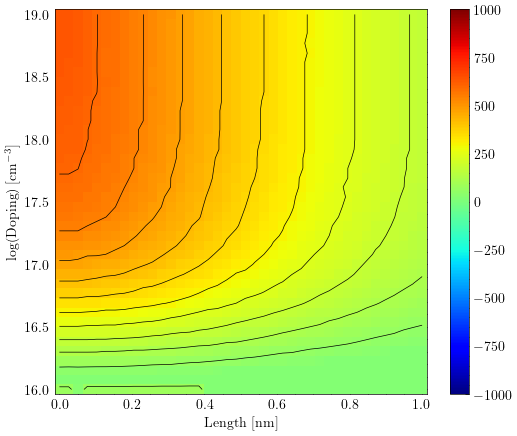

Breakdown Probability


/tmp/ipykernel_219036/1250823987.py:14: UserWarning: No contour levels were found within the data range.
  ax.contour(X, Y, Z, levels=isolines, colors='k', linewidths=0.5)


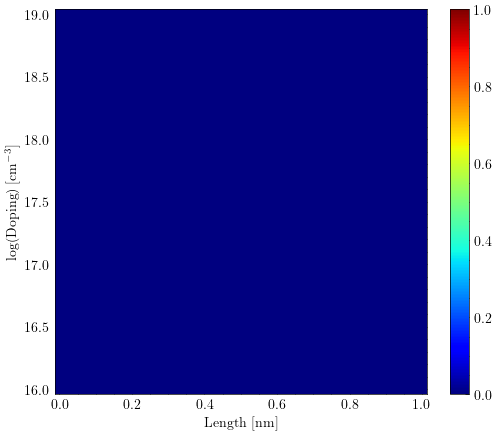

Breakdown Probability cost


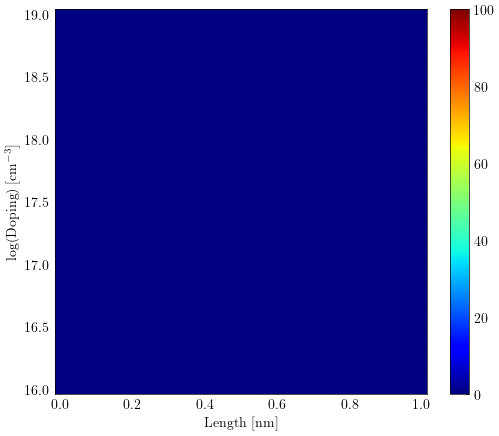

Depletion width [nm]


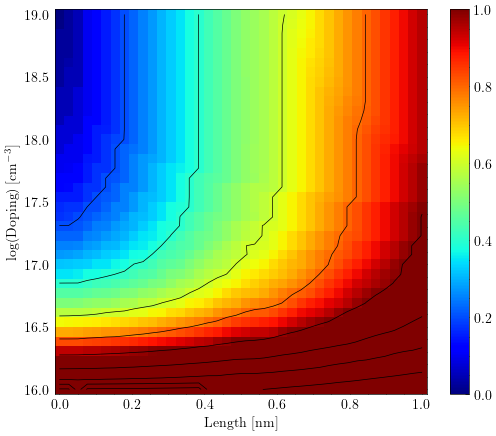

Depletion width cost


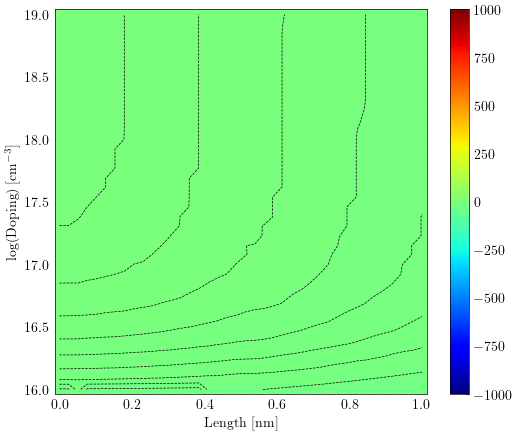

Cost function


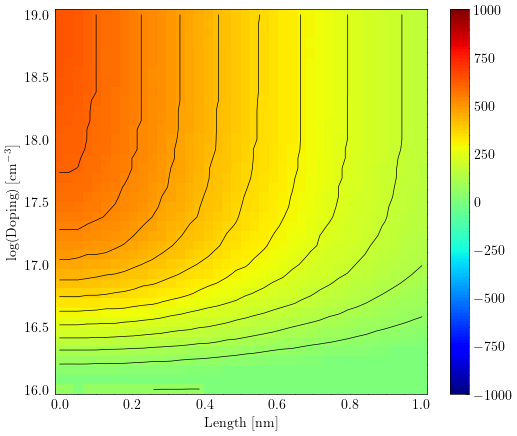

In [113]:
unique_length_intrinsic = np.unique(length_intrinsic)
unique_doping_acceptor = np.unique(doping_acceptor)
print(f"Size of the grid: {len(unique_length_intrinsic)} x {len(unique_doping_acceptor)} = {len(unique_length_intrinsic)*len(unique_doping_acceptor)}")

# Generate the heatmap
X, Y = np.meshgrid(unique_length_intrinsic, unique_doping_acceptor)

print("Breakdown voltage [V]")
BVs = BV.reshape(len(unique_length_intrinsic), len(unique_doping_acceptor)).T
generate_heatmap(X, Y, BVs, 0, 50, cmap='jet', logscale=False, save='BV_heatmap.pdf', isolines=10)

print("Breakdown voltage cost")
BV_COSTs = -BV_COST.reshape(len(unique_length_intrinsic), len(unique_doping_acceptor)).T
generate_heatmap(X, Y, BV_COSTs, -1000, 1000, cmap='jet', logscale=False, save='BV_COST_heatmap.pdf' ,isolines=10)

print("Breakdown Probability")
BPs = BP.reshape(len(unique_length_intrinsic), len(unique_doping_acceptor)).T
generate_heatmap(X, Y, BPs, 0, 1, cmap='jet', logscale=False, save='BP_heatmap.pdf', isolines=10)

print("Breakdown Probability cost")
BP_COSTs = BP_COST.reshape(len(unique_length_intrinsic), len(unique_doping_acceptor)).T
generate_heatmap(X, Y, BP_COSTs, 0, 100, cmap='jet', logscale=False, save='BP_COST_heatmap.pdf', isolines=10)

print("Depletion width [nm]")
DWs = DW.reshape(len(unique_length_intrinsic), len(unique_doping_acceptor)).T
generate_heatmap(X, Y, DWs, 0, 1, cmap='jet', logscale=False, save='DW_heatmap.pdf', isolines=10)

print("Depletion width cost")
DW_COSTs = -DW_COST.reshape(len(unique_length_intrinsic), len(unique_doping_acceptor)).T
generate_heatmap(X, Y, DW_COSTs, -1000, 1000, cmap='jet', logscale=False, save='DW_COST_heatmap.pdf', isolines=10)

print("Cost function")
COSTs = COST.reshape(len(unique_length_intrinsic), len(unique_doping_acceptor)).T
generate_heatmap(X, Y, COSTs, -1000, 1000, cmap='jet', logscale=False, save='COST_heatmap.pdf', isolines=10)





In [29]:
NbLengthIntrinsic = len(unique_length_intrinsic)
NbDopingAcceptor = len(unique_doping_acceptor)

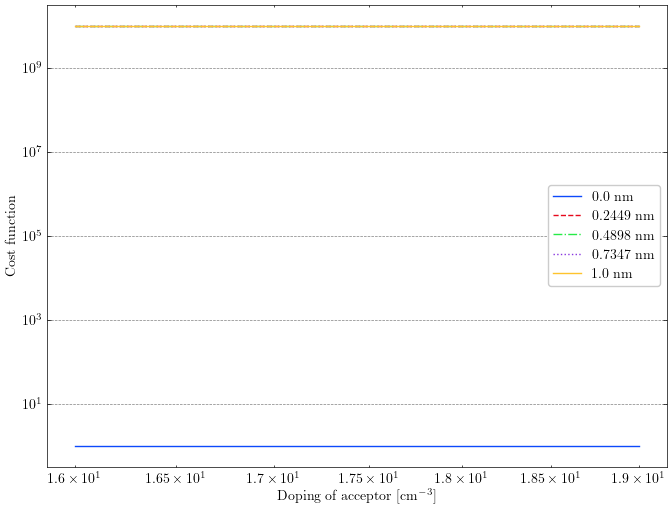

In [30]:
# Plot Cost function vs Doping of acceptor for different Length of intrinsic region
NbCurves = 5
fig, ax = plt.subplots(figsize=(8, 6))
index_length_intrinsic = np.linspace(0, NbLengthIntrinsic-1, NbCurves, dtype=int)
for i in index_length_intrinsic:
    ax.plot(unique_doping_acceptor, cost[:, i], label=f'{unique_length_intrinsic[i]} nm')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Doping of acceptor [cm$^{-3}$]')
ax.set_ylabel('Cost function')
ax.legend()

